# Gradient Descent (GD) and Stochastic Gradient Descent (SGD)

Optimization is at the heart of **machine learning, deep learning, and reinforcement learning**.  
Two fundamental optimization algorithms are **Gradient Descent (GD)** and its variant **Stochastic Gradient Descent (SGD)**.  

---

## 1. Gradient Descent (GD)

### Intuition
Gradient Descent is an **iterative optimization algorithm** used to minimize a function (usually the loss function in ML).  
It updates parameters in the **opposite direction of the gradient** of the function.

---

### Mathematical Formulation

Suppose we want to minimize an objective function:

$$
J(\theta) : \mathbb{R}^n \to \mathbb{R}
$$

where:
- \( \theta \) are the model parameters (vector of size \(n\))
- \( J(\theta) \) is the cost (loss) function

The update rule for **batch Gradient Descent** is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta J(\theta^{(t)})
$$

where:
- \( \eta > 0 \) is the **learning rate**
- \( \nabla_\theta J(\theta) \) is the **gradient of the cost function** with respect to parameters

---

### Example (Linear Regression)

For a dataset with \( m \) samples:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \Big( h_\theta(x^{(i)}) - y^{(i)} \Big)^2
$$

where the hypothesis is:

$$
h_\theta(x^{(i)}) = \theta^T x^{(i)}
$$

The gradient is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} \sum_{i=1}^m \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

So the update step is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \cdot \frac{1}{m} \sum_{i=1}^m \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

---

## 2. Stochastic Gradient Descent (SGD)

### Intuition
- **Batch GD** computes the gradient using the **entire dataset**.
- **SGD** computes the gradient using **just one random sample (or a mini-batch)** at each step.  
This introduces **noise** in the updates, but makes SGD much faster and often helps escape local minima.

---

### Mathematical Formulation

SGD update rule:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \, \nabla_\theta J(\theta; x^{(i)}, y^{(i)})
$$

where:
- A **single sample** \( (x^{(i)}, y^{(i)}) \) (or small mini-batch) is chosen at random
- Gradient is computed only on that sample instead of the whole dataset

---

### Example (Linear Regression with SGD)

For a single training example \( (x^{(i)}, y^{(i)}) \):

$$
\nabla_\theta J(\theta; x^{(i)}, y^{(i)}) = \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

So the update step is:

$$
\theta^{(t+1)} = \theta^{(t)} - \eta \cdot \Big( h_\theta(x^{(i)}) - y^{(i)} \Big) x^{(i)}
$$

---

## 3. GD vs SGD

| Aspect | Gradient Descent (GD) | Stochastic Gradient Descent (SGD) |
|--------|------------------------|-----------------------------------|
| Update | Uses **all data** per step | Uses **1 sample / mini-batch** per step |
| Speed  | Slower (needs full dataset each step) | Faster updates, suitable for large datasets |
| Convergence | Stable, smooth convergence | Noisy path, but can escape local minima |
| Use-case | Small datasets | Large-scale ML/DL problems |

---

## 4. Visual Intuition

- **GD**: Takes slow but steady steps, smoothly converging.  
- **SGD**: Takes noisy, zigzagging steps, but often reaches minima faster.

---

## 5. Extensions

- **Mini-Batch Gradient Descent**: Middle ground between GD and SGD.
- **Momentum, RMSProp, Adam**: Advanced optimizers building on SGD with adaptive learning rates and momentum.

---

# Conclusion
- **GD** = precise, but slow for large datasets.  
- **SGD** = noisy, but efficient for large-scale ML/DL.  
Both are foundations of modern optimization in deep learning.



In [4]:
import numpy as np
import tensorflow as tf,keras
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:

X,y=make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,n_clusters_per_class=1,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [6]:
X_train=tf.constant(X_train,dtype=tf.float32)
y_train=tf.constant(y_train.reshape(-1,1),dtype=tf.float32)

In [ ]:
# sigmoid function
def sigmoid(z):
    return 1 / (1+tf.exp(-z))

# training function

def train_gd(learning_rate=0.1,epochs=200):
    W=tf.Variable(tf.random.normal([2,1]))
    b=tf.Variable(tf.random.normal([1]))
    losses=[]

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            logits=tf.matmul(X_train,W)+b
            y_pred=sigmoid(logits)
            loss = tf.reduce_mean(-(y_train * tf.math.log(y_pred + 1e-9) +
                                    (1 - y_train) * tf.math.log(1 - y_pred + 1e-9)))

        grads=tape.gradient(loss,[W,b])
        W.assign_sub(learning_rate * grads[0])
        b.assign_sub(learning_rate * grads[1])
        losses.append(loss.numpy())
        print(f"Epoch {epoch+1}/ {epochs},Loss= {loss.numpy():.4f}")

    return losses

def train_sgd(learning_rate=0.1,epochs=200):
    W=tf.Variable(tf.random.normal([2,1]))
    b=tf.Variable(tf.random.normal([1]))
    losses=[]

    for epoch in range(epochs):
        for i in range(len(X_train)):
            xi=tf.reshape(X_train[i],(1,-1))
            yi=y_train[i]
            with tf.GradientTape() as tape:
                logits=tf.matmul(xi,W)+b
                y_pred=sigmoid(logits)
                loss=-(yi*tf.math.log(y_pred+1e-9)+(1-yi)*tf.math.log(1-y_pred+1e-9))
            grads=tape.gradient(loss,[W,b])
            W.assign_sub(learning_rate*grads[0])
            b.assign_sub(learning_rate*grads[1])
        losses.append(loss.numpy().mean())
        print(f"Epoch {epoch+1}/ {epochs},Loss= {loss.numpy().mean():.4f}")


    return losses
def train_minibatch(batch_size=32, learning_rate=0.1, epochs=100):
    W = tf.Variable(tf.random.normal([2, 1]))
    b = tf.Variable(tf.random.normal([1]))
    losses = []

    n_samples = X_train.shape[0]

    for epoch in range(epochs):
        # Shuffle data
        idx = np.random.permutation(n_samples)
        X_shuffled, y_shuffled = tf.gather(X_train, idx), tf.gather(y_train, idx)

        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            with tf.GradientTape() as tape:
                logits = tf.matmul(X_batch, W) + b
                y_pred = sigmoid(logits)
                loss = tf.reduce_mean(-(y_batch * tf.math.log(y_pred + 1e-9) +
                                        (1 - y_batch) * tf.math.log(1 - y_pred + 1e-9)))
            grads = tape.gradient(loss, [W, b])
            W.assign_sub(learning_rate * grads[0])
            b.assign_sub(learning_rate * grads[1])

        losses.append(loss.numpy())
        print(f"Epoch {epoch+1}/ {epochs},Loss= {loss.numpy().mean():.4f}")

    return losses


Epoch 1/ 200,Loss= 0.7648
Epoch 2/ 200,Loss= 0.7440
Epoch 3/ 200,Loss= 0.7238
Epoch 4/ 200,Loss= 0.7044
Epoch 5/ 200,Loss= 0.6856
Epoch 6/ 200,Loss= 0.6676
Epoch 7/ 200,Loss= 0.6502
Epoch 8/ 200,Loss= 0.6335
Epoch 9/ 200,Loss= 0.6175
Epoch 10/ 200,Loss= 0.6022
Epoch 11/ 200,Loss= 0.5875
Epoch 12/ 200,Loss= 0.5734
Epoch 13/ 200,Loss= 0.5600
Epoch 14/ 200,Loss= 0.5471
Epoch 15/ 200,Loss= 0.5349
Epoch 16/ 200,Loss= 0.5232
Epoch 17/ 200,Loss= 0.5120
Epoch 18/ 200,Loss= 0.5013
Epoch 19/ 200,Loss= 0.4912
Epoch 20/ 200,Loss= 0.4815
Epoch 21/ 200,Loss= 0.4723
Epoch 22/ 200,Loss= 0.4635
Epoch 23/ 200,Loss= 0.4551
Epoch 24/ 200,Loss= 0.4471
Epoch 25/ 200,Loss= 0.4395
Epoch 26/ 200,Loss= 0.4322
Epoch 27/ 200,Loss= 0.4253
Epoch 28/ 200,Loss= 0.4187
Epoch 29/ 200,Loss= 0.4123
Epoch 30/ 200,Loss= 0.4063
Epoch 31/ 200,Loss= 0.4005
Epoch 32/ 200,Loss= 0.3950
Epoch 33/ 200,Loss= 0.3898
Epoch 34/ 200,Loss= 0.3847
Epoch 35/ 200,Loss= 0.3799
Epoch 36/ 200,Loss= 0.3753
Epoch 37/ 200,Loss= 0.3708
Epoch 38/ 

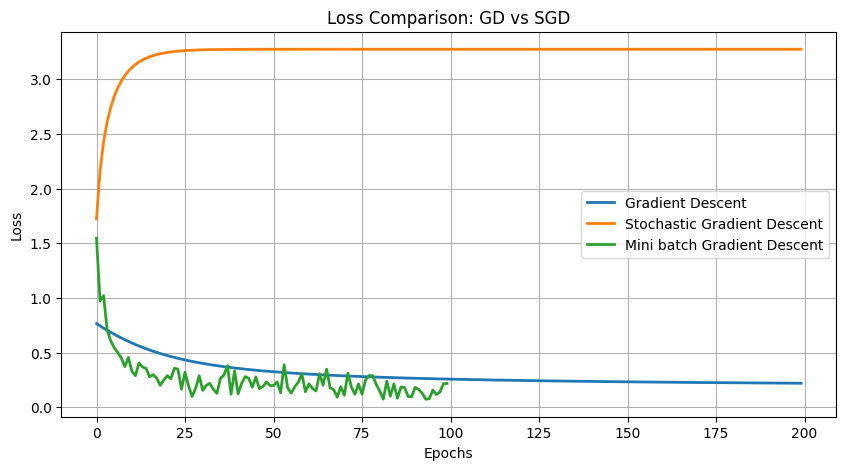

In [8]:
from cProfile import label


gd_losees=train_gd()
sdg_losses=train_sgd()
minibatch_losses=train_minibatch()
plt.figure(figsize=(10,5))
plt.plot(gd_losees, label="Gradient Descent", linewidth=2)
plt.plot(sdg_losses, label="Stochastic Gradient Descent", linewidth=2)
plt.plot(minibatch_losses,label="Mini batch Gradient Descent",linewidth=2)
plt.title("Loss Comparison: GD vs SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

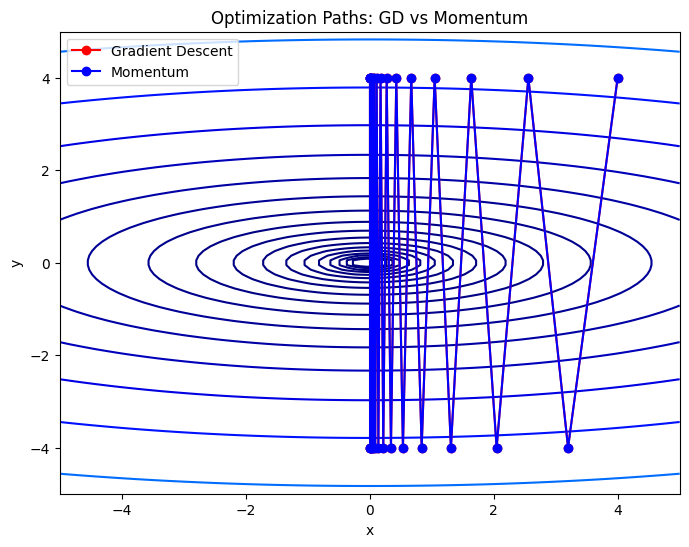

In [16]:
# momentum optimization
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return x**2 +10*y**2

def grad_f(x,y):
    return np.array([2*x,20*y])

learnin_rate=0.1
beta=0.9
steps=30

x_gd,y_gd=4.0,4.0
x_mom,y_mom=4.0,4.0
v=np.array([0.0,0.0])

# store trajactories
traj_gd=[(x_gd,y_gd)]
traj_mom=[(x_mom,y_mom)]

for _ in range(steps):
    g=grad_f(x_gd,y_gd)
    x_gd-=learnin_rate*g[0]
    y_gd-=learnin_rate*g[1]
    traj_gd.append((x_gd,y_gd))

    g_mom=grad_f(x_mom,y_mom)
    x_mom-=learnin_rate*g[0]
    y_mom-=learnin_rate*g[1]
    traj_mom.append((x_mom,y_mom))

# trajectory to array
traj_gd=np.array(traj_gd)
traj_mom=np.array(traj_mom)

# create contour plot
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y=np.meshgrid(x,y)
Z=f(X,Y)

plt.figure(figsize=(8,6))
plt.contour(X,Y,Z,levels=np.logspace(-1,3,20),cmap='jet')
plt.plot(traj_gd[:,0],traj_gd[:,1],'o-',label='Gradient Descent', color='red')
plt.plot(traj_mom[:, 0], traj_mom[:, 1], 'o-', label='Momentum', color='blue')
plt.title("Optimization Paths: GD vs Momentum")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

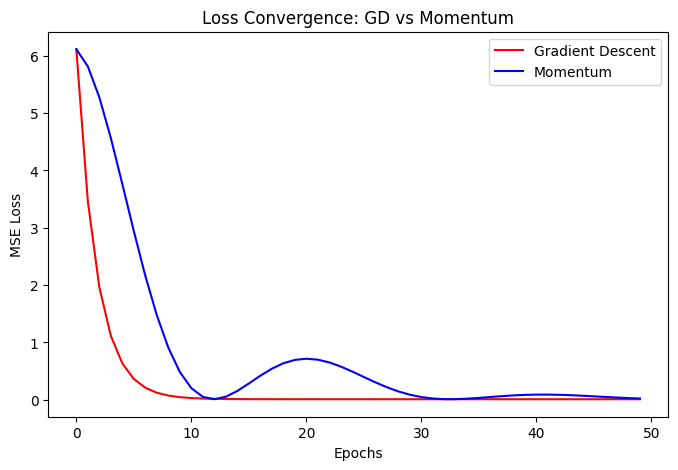

In [20]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 * X + 2 + np.random.randn(100, 1) * 0.1


w_gd, b_gd = 4.0, 4.0
w_mom, b_mom = 4.0, 4.0
vw, vb = 0.0, 0.0


eta = 0.1
beta = 0.9
epochs = 50
m = len(X)


loss_gd, loss_mom = [], []


for epoch in range(epochs):

    y_pred_gd = w_gd * X + b_gd
    y_pred_mom = w_mom * X + b_mom


    dw_gd = (-2/m) * np.sum(X * (y - y_pred_gd))
    db_gd = (-2/m) * np.sum(y - y_pred_gd)

    dw_mom = (-2/m) * np.sum(X * (y - y_pred_mom))
    db_mom = (-2/m) * np.sum(y - y_pred_mom)


    w_gd -= eta * dw_gd
    b_gd -= eta * db_gd


    vw = beta * vw + (1 - beta) * dw_mom
    vb = beta * vb + (1 - beta) * db_mom
    w_mom -= eta * vw
    b_mom -= eta * vb


    loss_gd.append(np.mean((y - y_pred_gd)**2))
    loss_mom.append(np.mean((y - y_pred_mom)**2))

# Plot losses
plt.figure(figsize=(8,5))
plt.plot(loss_gd, label="Gradient Descent", color="red")
plt.plot(loss_mom, label="Momentum", color="blue")
plt.title("Loss Convergence: GD vs Momentum")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()
